# Scaling Numeric Data
## Exercises


### Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


(2134889, 8)
(2096851, 8)


In [2]:
train = wrangle.train
validate = wrangle.validate
test = wrangle.test

### visualizing split data train, validate, and test 

In [3]:
train

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,6037
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,6111
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,6037
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,6059
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,6037
...,...,...,...,...,...,...,...,...
728188,12823382,3.0,2.0,1545.0,327671.0,1951,4082.33,6037
1285982,12199184,2.0,1.0,1656.0,32357.0,1909,940.08,6037
1929500,11345782,4.0,3.0,2544.0,514071.0,1999,6987.84,6037
1770542,12300227,4.0,3.0,2512.0,399925.0,1947,5213.92,6037


In [4]:
validate

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1412298,11016387,3.0,2.0,1854.0,283044.0,1961,3601.36,6037
1641778,12378229,2.0,3.0,1153.0,198634.0,1923,3309.64,6037
334609,10763511,3.0,2.0,1530.0,219055.0,1951,2755.15,6037
1444550,10994385,3.0,2.0,1183.0,445278.0,1951,5357.36,6037
1598351,12238672,3.0,1.0,1104.0,38266.0,1953,961.10,6037
...,...,...,...,...,...,...,...,...
1438910,12869522,3.0,2.0,1148.0,476000.0,1952,5805.97,6037
779459,12078574,4.0,4.0,2984.0,843019.0,1989,9256.81,6037
791688,12484901,3.0,1.0,1138.0,72854.0,1950,1176.86,6037
1243004,12250497,2.0,1.0,640.0,44794.0,1921,722.00,6037


In [5]:
test

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1489530,11756252,3.0,1.0,1709.0,456955.0,1923,5586.16,6037
733304,10816182,4.0,3.0,2398.0,384626.0,1950,4737.45,6037
162905,10846793,2.0,1.0,1014.0,89135.0,1948,1114.93,6037
1637601,10797523,2.0,3.0,2416.0,800000.0,1954,9730.20,6037
221776,12771827,4.0,2.0,1955.0,174264.0,1978,2405.11,6037
...,...,...,...,...,...,...,...,...
1668235,14328284,4.0,3.0,2407.0,852619.0,2004,11417.46,6059
1580991,14199403,3.0,2.0,1680.0,315671.0,1984,3906.66,6059
1305535,11317009,3.0,2.0,1080.0,141451.0,1992,2528.86,6037
1408656,14145336,4.0,3.0,2789.0,163057.0,1962,2036.84,6059


***

### shape of train, test, and validate

In [6]:
print('train shape: %d x %d' % train.shape)
print('test shape: %d x %d' % test.shape)
train.head()

train shape: 1174236 x 8
test shape: 419371 x 8


,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349905,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,6037
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,6111
1244806,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,6037
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,6059
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,6037


***

### Fit and scale function 

In [7]:
def fit_and_scale(scaler, train, validate, test):
    # only scales float columns
    floats = train.select_dtypes(include='float64').columns
    # fits scaler to training data only, then transforms
    # train, validate & test
    scaler.fit(train[floats])
    scaled_train = pd.DataFrame(data=scaler.transform(train[floats]), columns=floats)
    scaled_validate = pd.DataFrame(data=scaler.transform(validate[floats]), columns=floats)
    scaled_test = pd.DataFrame(data=scaler.transform(test[floats]), columns=floats)
    return scaled_train, scaled_validate, scaled_test

***

### 1) Visualize the results for the unscaled and scaled distribution . 

### Min-Max Scaling

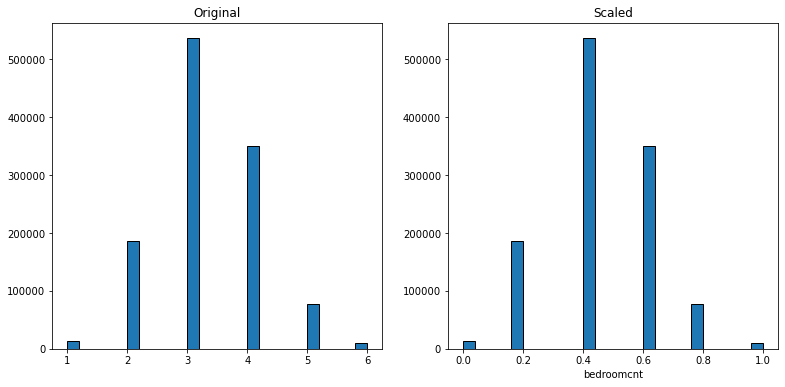

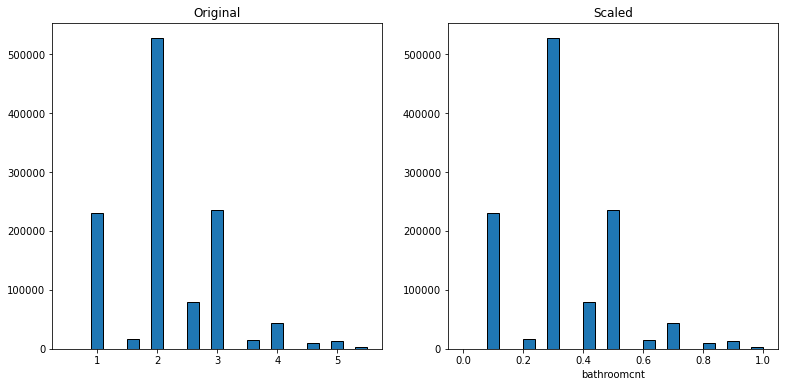

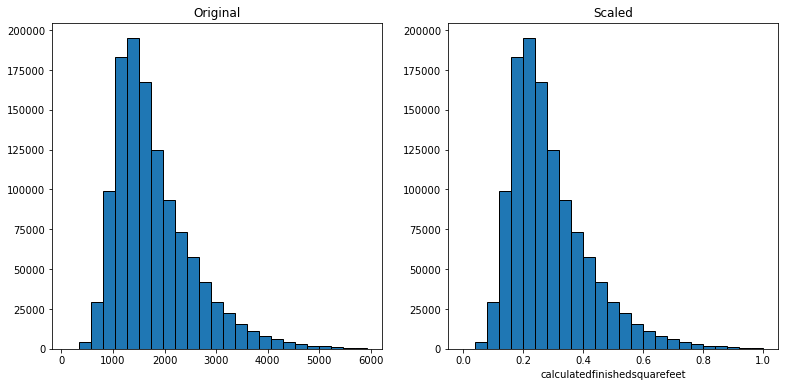

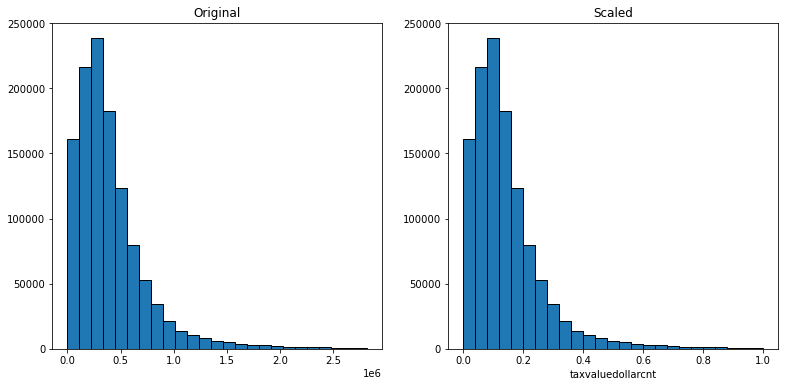

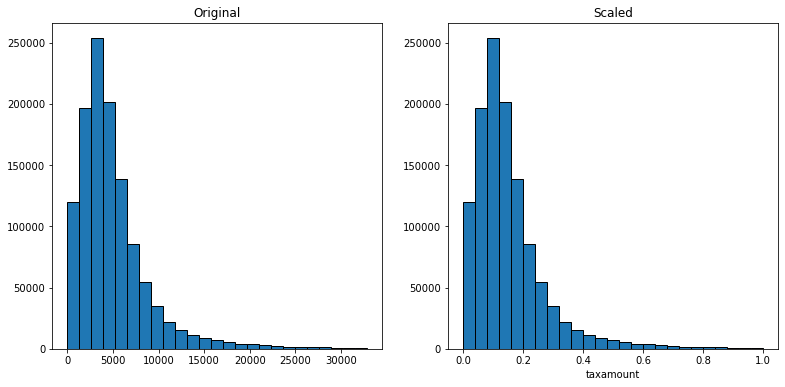

In [8]:
# transforms the scale to 0-1 scale, from original:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
scaler.fit(train)
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)
quants = min_max_train.columns
train_quants = train[quants]
#print(train_quants)
#---------------------------------------------------------------------------------------------------------------------
for col in train_quants.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)


***

### Standard Scaler

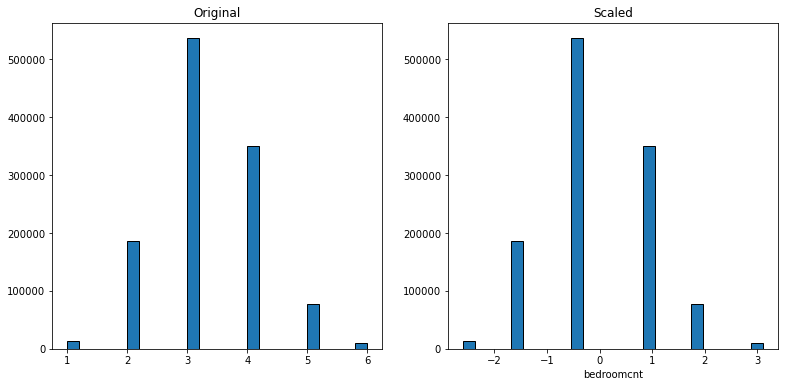

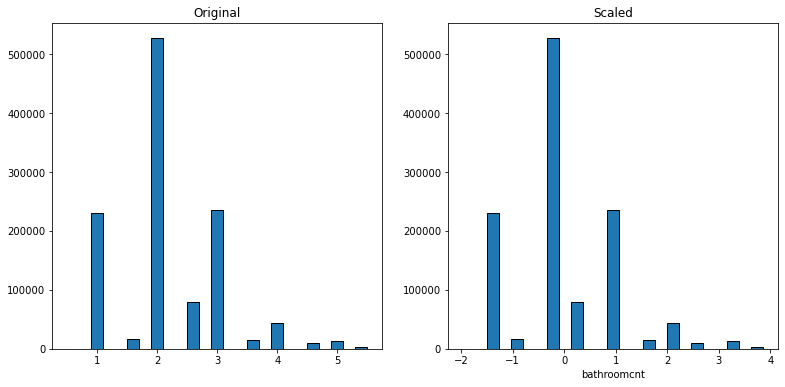

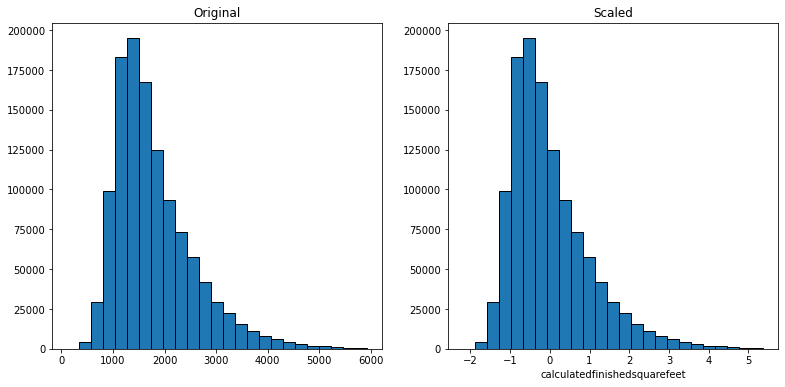

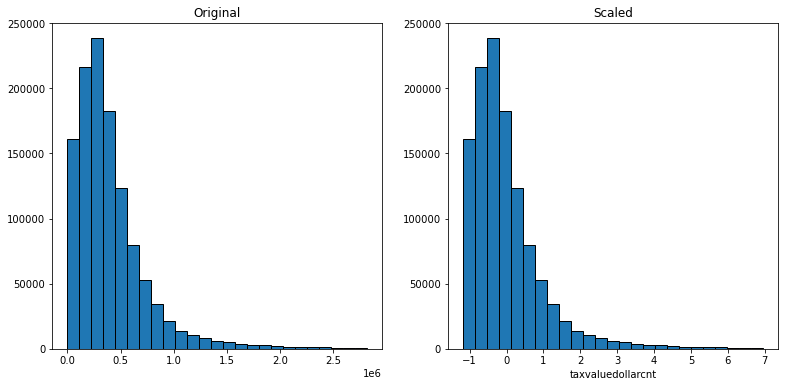

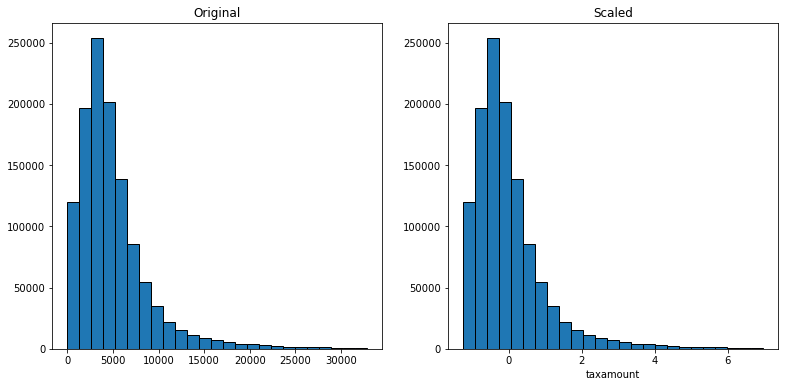

In [9]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)
quants = min_max_train.columns
train_quants = train[quants]

#----------------------------------------------------------------------------------------------------------------------
for col in train_quants.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)


***

### Robust scaler 

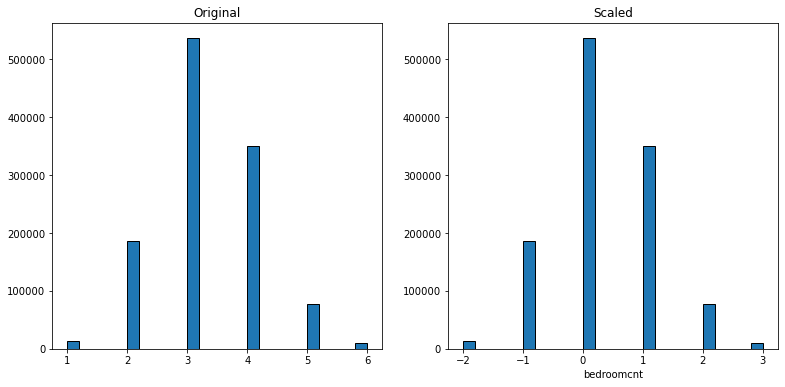

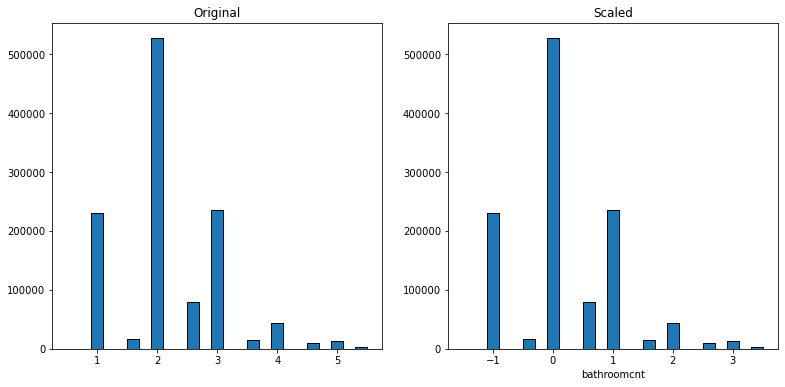

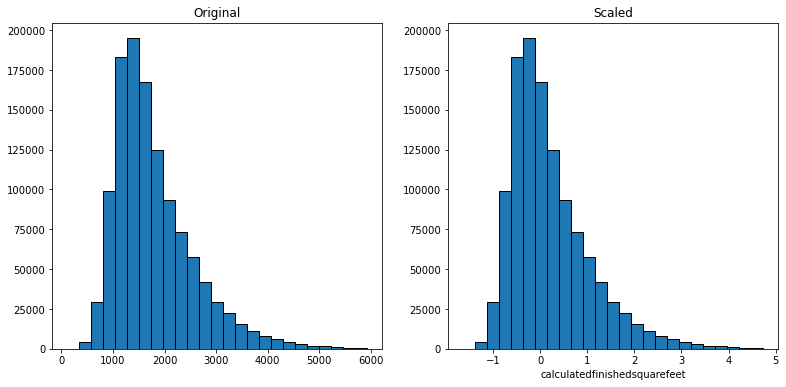

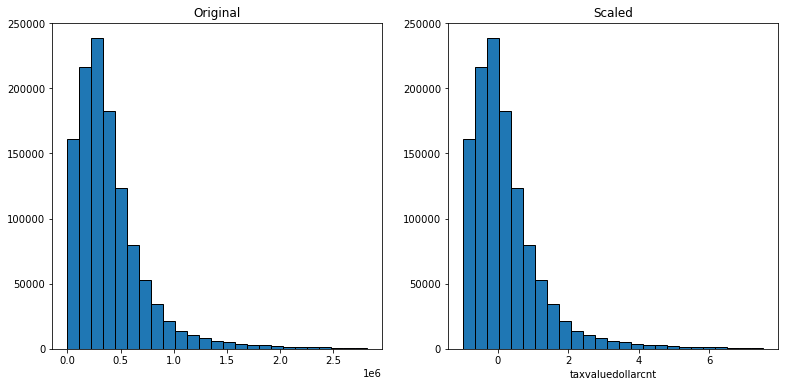

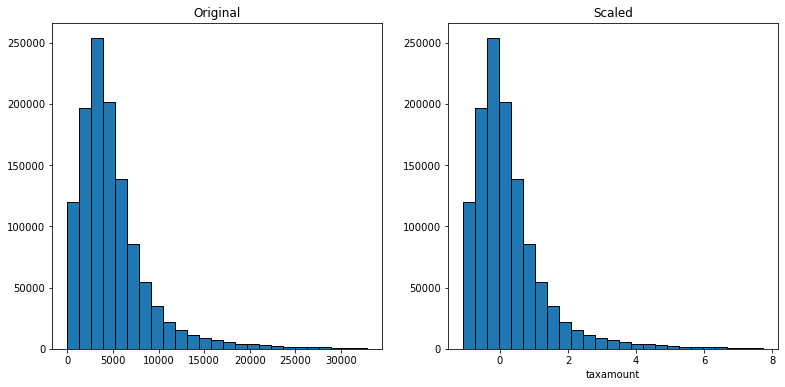

In [10]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)
min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)
quants = min_max_train.columns
train_quants = train[quants]

#----------------------------------------------------------------------------------------------------------------------
for col in train_quants.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)

***

### 2)Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?